In [111]:
#importing required modules

import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import bokeh
from scipy import stats
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.model_selection import GridSearchCV



import seaborn as sn
import matplotlib.pyplot as plt
sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [112]:
df = pd.read_csv('BlackFriday.csv')

In [113]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Checking for null values

In [115]:
%%timeit
df.isnull().mean()

85.8 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Here we would like to impute missing values with zero ,considering that person might not have ordered the perticular
product.

In [116]:

df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [117]:
#df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].median())

In [118]:
# dataset summary stats
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [120]:
# categorical variables
df['Product_ID'] = df.Product_ID.astype('category')
df['Gender'] = df.Gender.astype('category')
df['Age'] = df.Age.astype('category')
df['Occupation'] = df.Occupation.astype('category')

df['City_Category'] = df.City_Category.astype('category')


df['Marital_Status'] = df.Marital_Status.astype('category')
df['Product_Category_2'] = df.Marital_Status.astype('int')
df['Product_Category_3'] = df.Marital_Status.astype('int')

#df['Stay_In_Current_City_Years'] = df.Stay_In_Current_City_Years.astype('category')



In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null category
Gender                        537577 non-null category
Age                           537577 non-null category
Occupation                    537577 non-null category
City_Category                 537577 non-null category
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null category
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: category(6), int64(5), object(1)
memory usage: 28.4+ MB


In [122]:
if df['Stay_In_Current_City_Years'].dtype != 'int64':
    df['Stay_In_Current_City_Years'] = (df['Stay_In_Current_City_Years'].str.strip('+').astype(int))

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null category
Gender                        537577 non-null category
Age                           537577 non-null category
Occupation                    537577 non-null category
City_Category                 537577 non-null category
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null category
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: category(6), int64(6)
memory usage: 28.4 MB


 
We now need to encode our categorical variables. We select only the categorical variables and call pd.get_dummies() to dummy-code the non-numeric variables:


In [124]:
cols_to_transform = pd.DataFrame(df,columns=['Gender','Age','Occupation','City_Category','Marital_Status'])

In [125]:
dummies_class = pd.get_dummies(cols_to_transform)



In [126]:
final_df=df.join(dummies_class)
final_df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_A,City_Category_B,City_Category_C,Marital_Status_0,Marital_Status_1
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,0,0,15200,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,0,0,1057,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1000002,P00285442,M,55+,16,C,4,0,8,0,0,7969,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [127]:
df_new=final_df.drop(['Gender','Age','Occupation','City_Category','Marital_Status','User_ID','Product_ID'],axis=1)
df_new.shape



(537577, 40)

In [128]:
from sklearn import preprocessing,svm
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection,metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict

# Feature selection

Here we would  like to see if there are any constant features in dataframe which will not be helpful for model
performance but might be just consume time in model buidling process.

In [129]:
# remove constant features
constant_features = [
    feat for feat in df_new.columns if df_new[feat].std() == 0
]
 
df_new.drop(labels=constant_features, axis=1, inplace=True)

 
df_new.shape

(537577, 40)

In [130]:
#Looks like there are no constant features
constant_features

[]

In [131]:
#Here we cannot apply Spearson's correlation as discussed in exploratory data analysis because of non-parametric behaviour


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
#corr_features = correlation(df_new, 0.9)
#print('correlated features: ', len(set(corr_features)) )



we will just take sample of data from big dataset considering the limits of personal computing .

In [132]:
df_frac = df_new.sample(frac=0.05,random_state=100)

In [133]:
df_frac.shape

(26879, 40)

In [134]:
df_frac.columns

Index(['Stay_In_Current_City_Years', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_F',
       'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Marital_Status_0',
       'Marital_Status_1'],
      dtype='object')

In [135]:
x=df_frac.Purchase.unique()
max(x)

23955

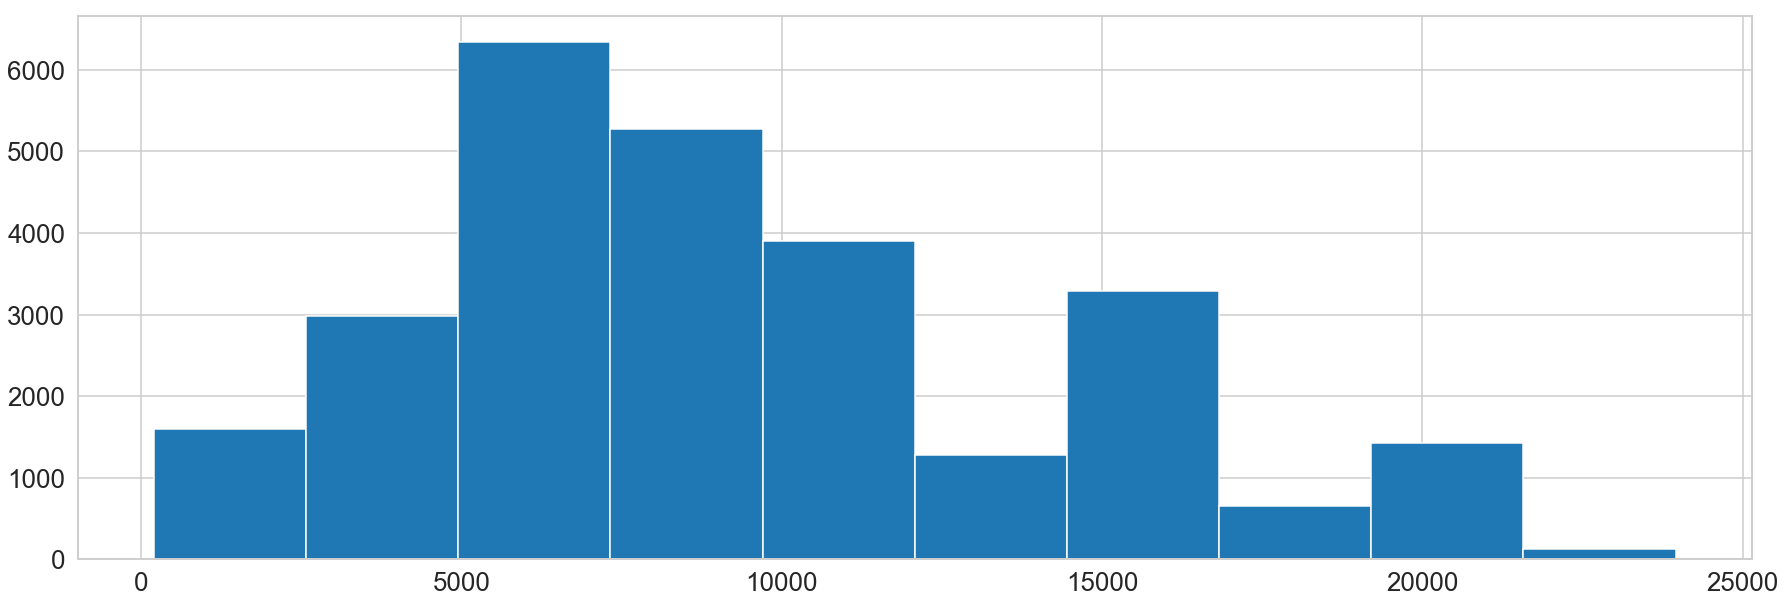

In [136]:
df_frac.Purchase.hist()

In [137]:
#X_train, X_test, y_train, y_test = train_test_split(df_frac.drop(labels=['Purchase'], axis=1),df_frac['Purchase'],test_size=0.3,random_state=0)
 
#X_train.shape, X_test.shape

We now need to stratify our  dataframe in order to remove any sampling biases.

There are no straightforward way of stratifying the models but we can simply tweak as belows:

In [138]:


# Create the bins.

bins = np.linspace(300, 20000, 10)

# Save your Y values in a new ndarray,
# broken down by the bins created above.

y_binned = np.digitize(df_frac['Purchase'], bins)

# Pass y_binned to the stratify argument,
# and sklearn will handle the rest

#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, stratify=y_binned)
#y_binned
bins

array([  300.        ,  2488.88888889,  4677.77777778,  6866.66666667,
        9055.55555556, 11244.44444444, 13433.33333333, 15622.22222222,
       17811.11111111, 20000.        ])

In [139]:
X_train, X_test, y_train, y_test = train_test_split(df_frac.drop(labels=['Purchase'], axis=1),df_frac['Purchase'],\
                                                    
                                                    test_size=0.3,random_state=0,stratify=y_binned)



# Linear Regression

# Start regression Analysis with basic linear Regression.

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [142]:
lm = LinearRegression()

In [143]:
model=lm.fit(X_train_scaled,y_train)
#print the coefficents
print("The linear cofficients",model.coef_)
# Try to predict the y ( NPP_Predict) for the test data-features(independent variables(X_test)
predictions=lm.predict(X_test_scaled)
# Accuracy of the prediction
confidence = lm.score(X_test_scaled, y_test)
confidence

The linear cofficients [-3.17077743e+01 -1.56597810e+03  4.01623699e+15  1.63346392e+15
  2.86405744e+15  2.86405744e+15  4.12473106e+14  9.70316575e+14
  1.22369608e+15  9.92281242e+14  6.86455576e+14  6.25102856e+14
  4.70630363e+14 -3.40876215e+15 -2.86769582e+15 -2.18826593e+15
 -1.80346866e+15 -3.48906897e+15 -1.49920472e+15 -1.89831691e+15
 -3.20399061e+15 -5.13189196e+14 -1.10268484e+15 -1.56568458e+15
 -1.43873955e+15 -2.39967070e+15 -1.20695984e+15 -2.25328047e+15
 -1.46839463e+15 -2.18128370e+15 -2.66225076e+15 -1.15131624e+15
 -1.36352156e+15 -2.43555489e+15  1.84472592e+16  2.04263080e+16
  1.91088961e+16  2.70311049e+15 -2.94659042e+15]


0.10775679211919063

No handles with labels found to put in legend.


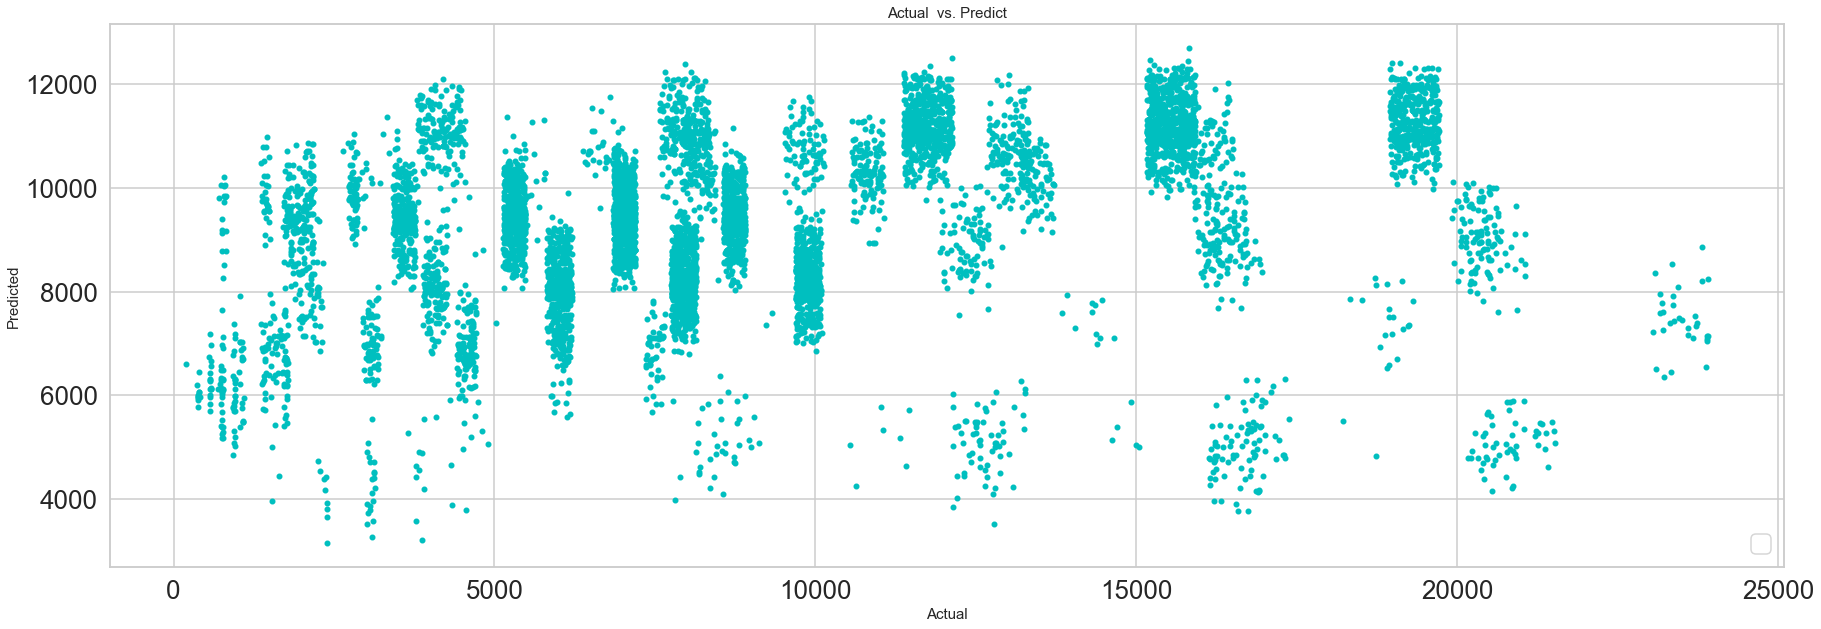

In [144]:
plt.legend(loc=4)
plt.title("Actual  vs. Predict", size=15)
plt.scatter(y_test,predictions,color="c", marker='.')
plt.xlabel("Actual", size=15)
plt.ylabel("Predicted", size=15)
plt.show()

No handles with labels found to put in legend.


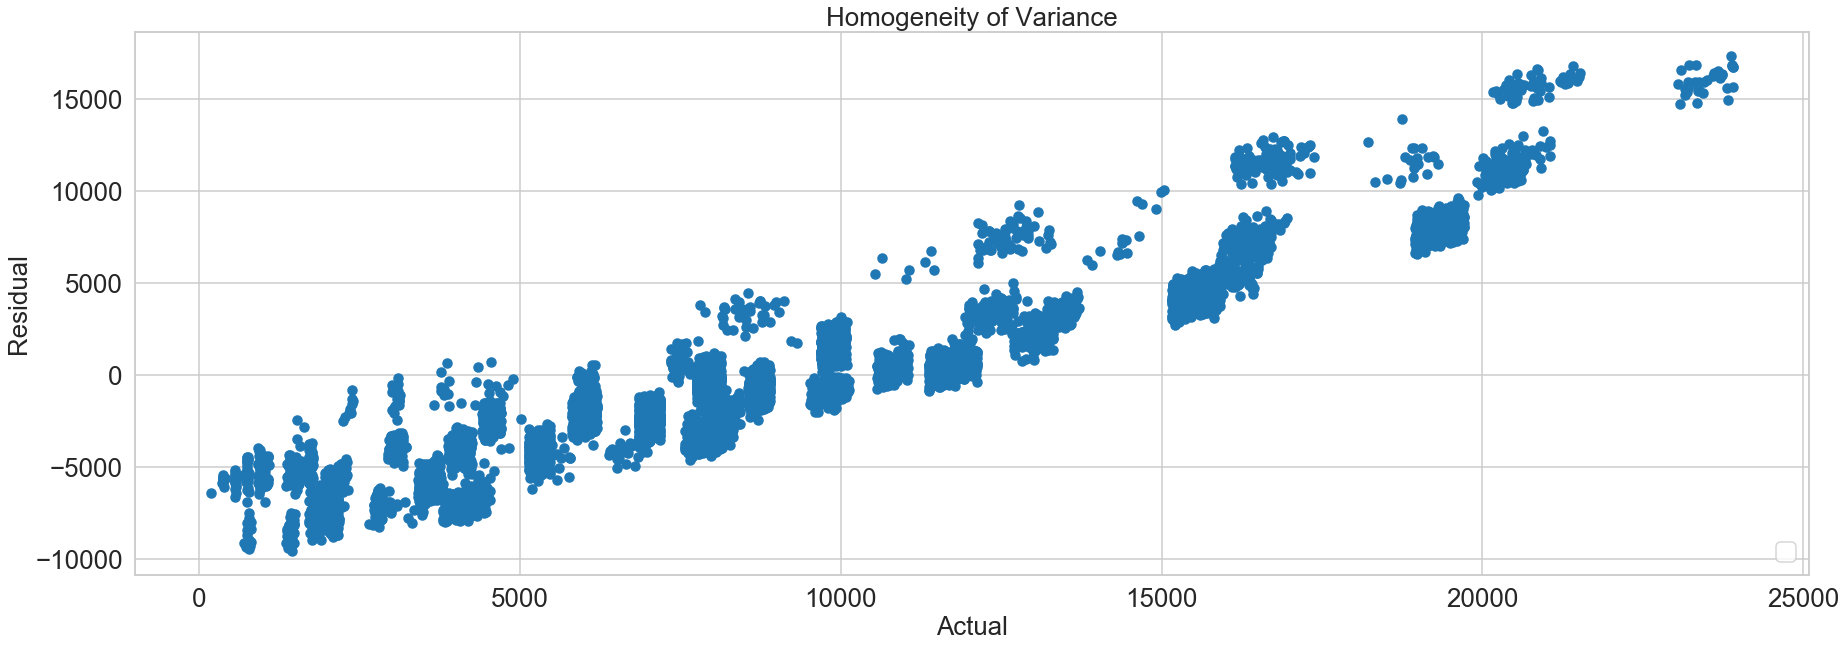

In [145]:
plt.legend(loc=4)
plt.title('Homogeneity of Variance')
plt.scatter(y_test,y_test-predictions)
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

In [146]:
r2_scores = cross_val_score(lm, X_train_scaled, y_train, cv=10)
mse_scores = cross_val_score(lm, X_train_scaled, y_train, cv=10,scoring='neg_mean_squared_error')
r2_scores

array([0.10276433, 0.13612122, 0.09786324, 0.08072777, 0.10483443,
       0.10216648, 0.10840678, 0.08061175, 0.12583022, 0.10796878])

In [147]:
mse_scores

array([-22167998.23097095, -21391023.60098515, -21821388.68648721,
       -23761306.09200816, -22735416.04616922, -21624205.37081981,
       -21647263.66284072, -23356791.94339012, -21864776.50770724,
       -21227105.88987685])

In [148]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [149]:
m = ols('Purchase ~  Gender + Age + Occupation + City_Category + Marital_Status + Product_Category_1 + Product_Category_2 + Product_Category_3',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2086.
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        00:37:33   Log-Likelihood:            -5.3089e+06
No. Observations:              537577   AIC:                         1.062e+07
Df Residuals:                  537545   BIC:                         1.062e+07
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.052e+04    

As we can see ,based on above graph,data violates assumption of Homogeneity of Variance and also the observed r2 value
is very low so it has very poor prediction.
So we will try to model this data using non-linear machine learning models such as Decision Tree,Random Forest,Gradient boosting
regressor etc.



# RandomForest

In [150]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    #'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [151]:
grid_search_rf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 13.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [152]:

grid_search_rf.score(X_train_scaled,y_train)

0.7106910757509879

In [153]:
y_train_pred = grid_search_rf.predict(X_train_scaled)

In [154]:
y_test_pred = grid_search_rf.predict(X_test_scaled)

In [155]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 7162115.2999, test: 9427669.6522


In [156]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.7107, test: 0.6180


# best parameters

In [157]:
print("Best parameters found: ", grid_search_rf.best_params_)



Best parameters found:  {'bootstrap': True, 'max_depth': 110, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 300}


In [158]:
rf1 = RandomForestRegressor(bootstrap= True, max_depth=80, \
                            min_samples_leaf= 5, min_samples_split= 12, n_estimators= 300)

In [159]:

rf1.fit(X_train_scaled,y_train)
y_train_pred = rf1.predict(X_train_scaled)

y_train_test = rf1.predict(X_test_scaled)

rf1.score(X_train_scaled,y_train)

0.7106604251818339

In [160]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.7107, test: 0.6180


In [161]:
print(rf1.feature_importances_)

[2.64741516e-02 8.70948391e-01 2.85872304e-03 2.75911878e-03
 3.73226702e-03 3.69190146e-03 7.84527036e-04 4.53053009e-03
 7.14597068e-03 5.46666950e-03 3.22720448e-03 2.50167568e-03
 1.42359347e-03 5.16036631e-03 3.76987739e-03 2.42338829e-03
 1.73036085e-03 4.52443406e-03 1.10362339e-03 1.26089887e-03
 4.73122769e-03 9.86259149e-05 3.61837657e-04 1.16477808e-03
 8.54198046e-04 3.04080698e-03 3.70654295e-04 2.76238085e-03
 1.29491794e-03 2.87239377e-03 3.56978031e-03 4.45943140e-04
 1.49939033e-03 2.82555197e-03 3.52451497e-03 3.43428909e-03
 6.23215173e-03 2.69490262e-03 2.70398194e-03]


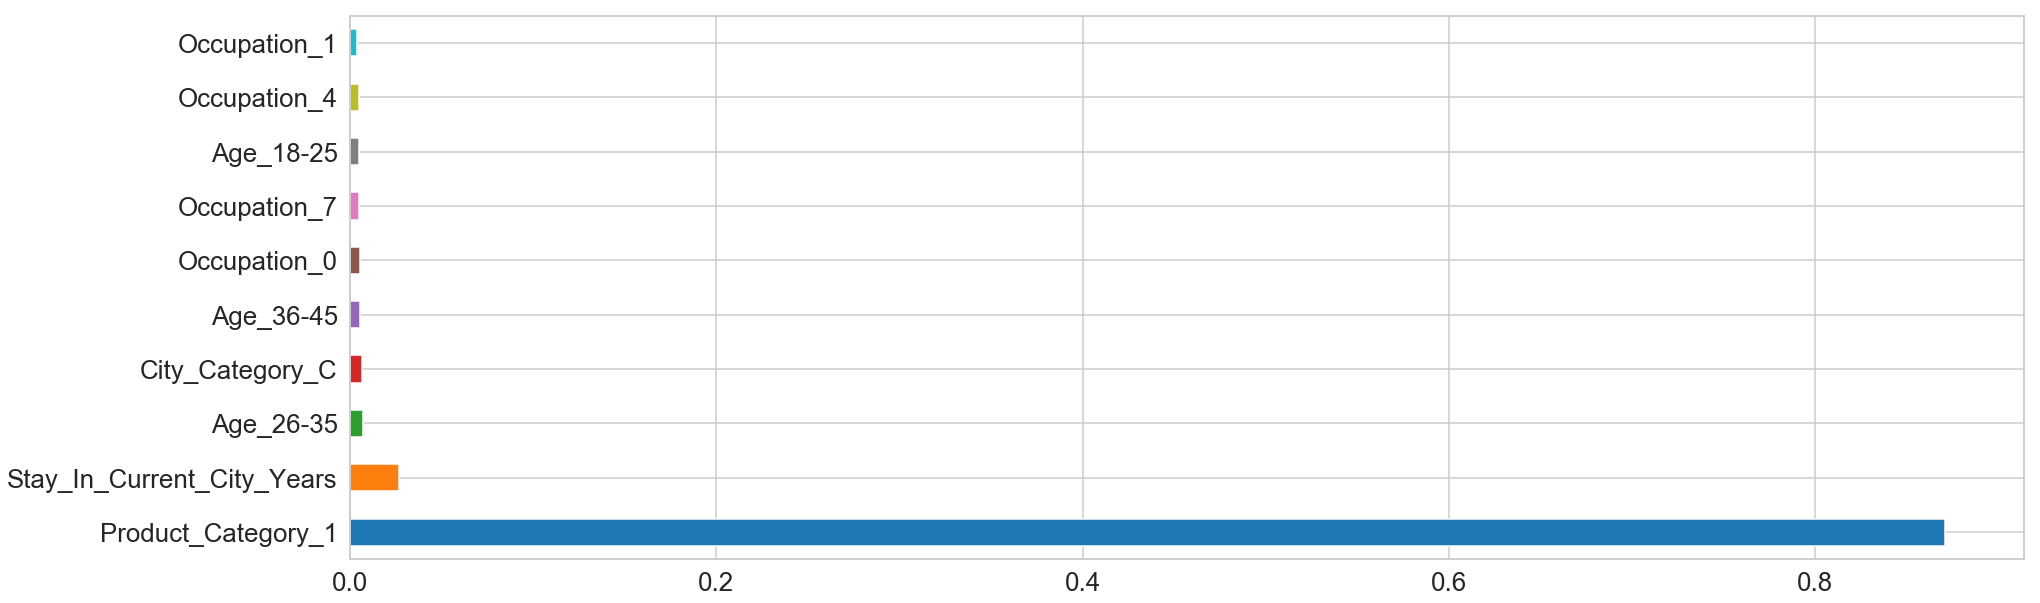

In [162]:
(pd.Series(rf1.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

# DECISIONTREE REGRESSOR

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [55]:
dtr = DecisionTreeRegressor(max_depth=10,
                            min_samples_split=6,
                            max_leaf_nodes=15)
dtr.fit(X_train_scaled,y_train)
dtr.score(X_train_scaled,y_train)

0.6345197012296385

In [56]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              #"max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

In [57]:
grid_cv_dtr = GridSearchCV(dtr,param_grid = param_grid, cv=3,n_jobs=-1)

In [58]:
grid_cv_dtr.fit(X_train_scaled,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=15, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'min_samples_leaf': [20, 40, 100], 'max_leaf_nodes': [5, 20, 100, 500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.6329444939377911
Best Hyperparameters::
{'criterion': 'mse', 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [60]:
dtr1 = DecisionTreeRegressor(criterion="mse", max_depth=6,\
                             min_samples_split=10,max_leaf_nodes=20,\
                             min_samples_leaf = 20)

In [61]:
dtr1.fit(X_train_scaled,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [62]:
y_train_pred = dtr1.predict(X_train_scaled)

In [63]:
y_test_pred = dtr1.predict(X_test_scaled)

In [64]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 9002309.0269, test: 9217865.6264


In [65]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.6364, test: 0.6265


# Gradient Boosting Regressor

In [66]:
from sklearn import ensemble


In [67]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train_scaled, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test_scaled))
print("MSE: %.4f" % mse)

MSE: 9192380.9399


In [68]:
y_train_pred = clf.predict(X_train_scaled)

In [69]:
y_test_pred = clf.predict(X_test_scaled)

In [70]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 8890539.7114, test: 9192380.9399


In [71]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.6409, test: 0.6276


# hyperparameter tuning and gridsearch cv

In [72]:
gbr = ensemble.GradientBoostingRegressor(random_state=0)

param_grid = {
        'n_estimators': [800,1500],
        'max_features': [20,15],
        'max_depth': [8,10],
        'learning_rate': [0.1],
        'subsample': [1]
     }
    
model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=-1, cv=2, scoring='r2')
model.fit(X_train_scaled, y_train)
print('Gradient boosted tree regression...')
print('Best Params:')
print(model.best_params_)
print('Best CV Score:')
print(-model.best_score_)

#y_pred = model.predict(Xtest)
#y_pred, -model.best_score_


# read data, build model and do prediction 

Gradient boosted tree regression...
Best Params:
{'learning_rate': 0.1, 'max_depth': 8, 'max_features': 15, 'n_estimators': 800, 'subsample': 1}
Best CV Score:
-0.5218215978696872


In [73]:
params1 = {'n_estimators': 800, 'max_depth': 8,'max_features': 15,\
           'learning_rate': 0.1, 'subsample':1}
clf1 = ensemble.GradientBoostingRegressor(**params1)

clf1.fit(X_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=15,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=800, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
y_train_pred = clf1.predict(X_train_scaled)

In [75]:
y_test_pred = clf1.predict(X_test_scaled)

In [76]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 5040245.5088, test: 11083854.6745


In [77]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.7964, test: 0.5509


Tuning parameters
Many strategies exist on how to tune parameters. See for example this blog post on Machine Learning Mastery 
for some guidance from academic papers. Most data scientist see number of trees, tree depth and the learning 
rate as most crucial parameters.
Hence, we will start off with these three and then move to other tree-specific parameters and the subsamples. 
I will use 5-fold cross validation and evaluate models based on accuracy. 
You may also consider to evaluate the model based on a different measure such as roc_auc.


# XGBoost

In [78]:
import xgboost as xgb

In [79]:
# Create the training and test sets

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train_scaled, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test_scaled)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4949.091620


In [80]:
y_train_pred = xg_reg.predict(X_train_scaled)
y_test_pred = xg_reg.predict(X_test_scaled)

In [81]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train_scaled, label=y_train)
DM_test =  xgb.DMatrix(data=X_test_scaled, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)


dmtrainpreds = xg_reg.predict(DM_train)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

#print(-xg_reg.best_score_)



RMSE: 4700.696871


In [82]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X_train_scaled, label=y_train)

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', cv=4, verbose=1,n_jobs=-1)
grid_mse.fit(X_train_scaled, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    7.6s finished


Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  3013.301245603711


In [83]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50)

In [84]:
xg_reg.fit(X_train_scaled,y_train)

preds = xg_reg.predict(X_test_scaled)

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3028.821733


In [86]:
y_train_pred = xg_reg.predict(X_train_scaled)

In [87]:
y_test_pred = xg_reg.predict(X_test_scaled)

In [88]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 8743671.9921, test: 9173761.0918


In [89]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.6468, test: 0.6283


# LGBM

In [90]:
import lightgbm as lgb
lgb.LGBMRegressor

lightgbm.sklearn.LGBMRegressor

In [91]:
lg = lgb.LGBMRegressor(silent=True)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, verbose=5)
grid_search.fit(X_train_scaled,y_train)
grid_search.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 20.4min finished


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.01, max_depth=25,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [92]:
lgbm= lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,\
                    importance_type='split', learning_rate=0.01, max_depth=50,\
                    min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,\
                    n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,\
                    random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,\
                    subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgbm.fit(X_train_scaled, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.01, max_depth=50,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [93]:
y_train_pred = lgbm.predict(X_train_scaled)

In [94]:
y_test_pred = lgbm.predict(X_test_scaled)

In [95]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 8299148.7453, test: 9514705.9013


In [96]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.6648, test: 0.6145


In [164]:
type1=['Train','Test','Train','Test','Train','Test','Train','Test','Train','Test']
algorithms = ['Decision Tree','Decision Tree','Random Forest','Random Forest','Gradient Boosting Regressor',\
              'Gradient Boosting Regressor','XGBOOST','XGBOOST','LGBM','LGBM']
value = [0.6364,0.6265,0.7107,0.6180,0.6409,0.6276,0.6468,0.6283,0.6648,0.6145]

mse = [9002309.0269,9217865.6264,7162115.2999,9427669.6522,8890539.7114,9192380.9399,8743671.9921,9173761.0918,8299148.7453,9514705.9013]
       


In [165]:
df = pd.DataFrame({'TYPE':type1,'R2_Value' : value,'Model':algorithms})

df.head()


,TYPE,R2_Value,Model
0,Train,0.6364,Decision Tree
1,Test,0.6265,Decision Tree
2,Train,0.7107,Random Forest
3,Test,0.6180,Random Forest
4,Train,0.6409,Gradient Boosting Regressor


In [166]:
df.groupby(['Model','TYPE'])['R2_Value'].mean()

Model                        TYPE 
Decision Tree                Test     0.6265
                             Train    0.6364
Gradient Boosting Regressor  Test     0.6276
                             Train    0.6409
LGBM                         Test     0.6145
                             Train    0.6648
Random Forest                Test     0.6180
                             Train    0.7107
XGBOOST                      Test     0.6283
                             Train    0.6468
Name: R2_Value, dtype: float64

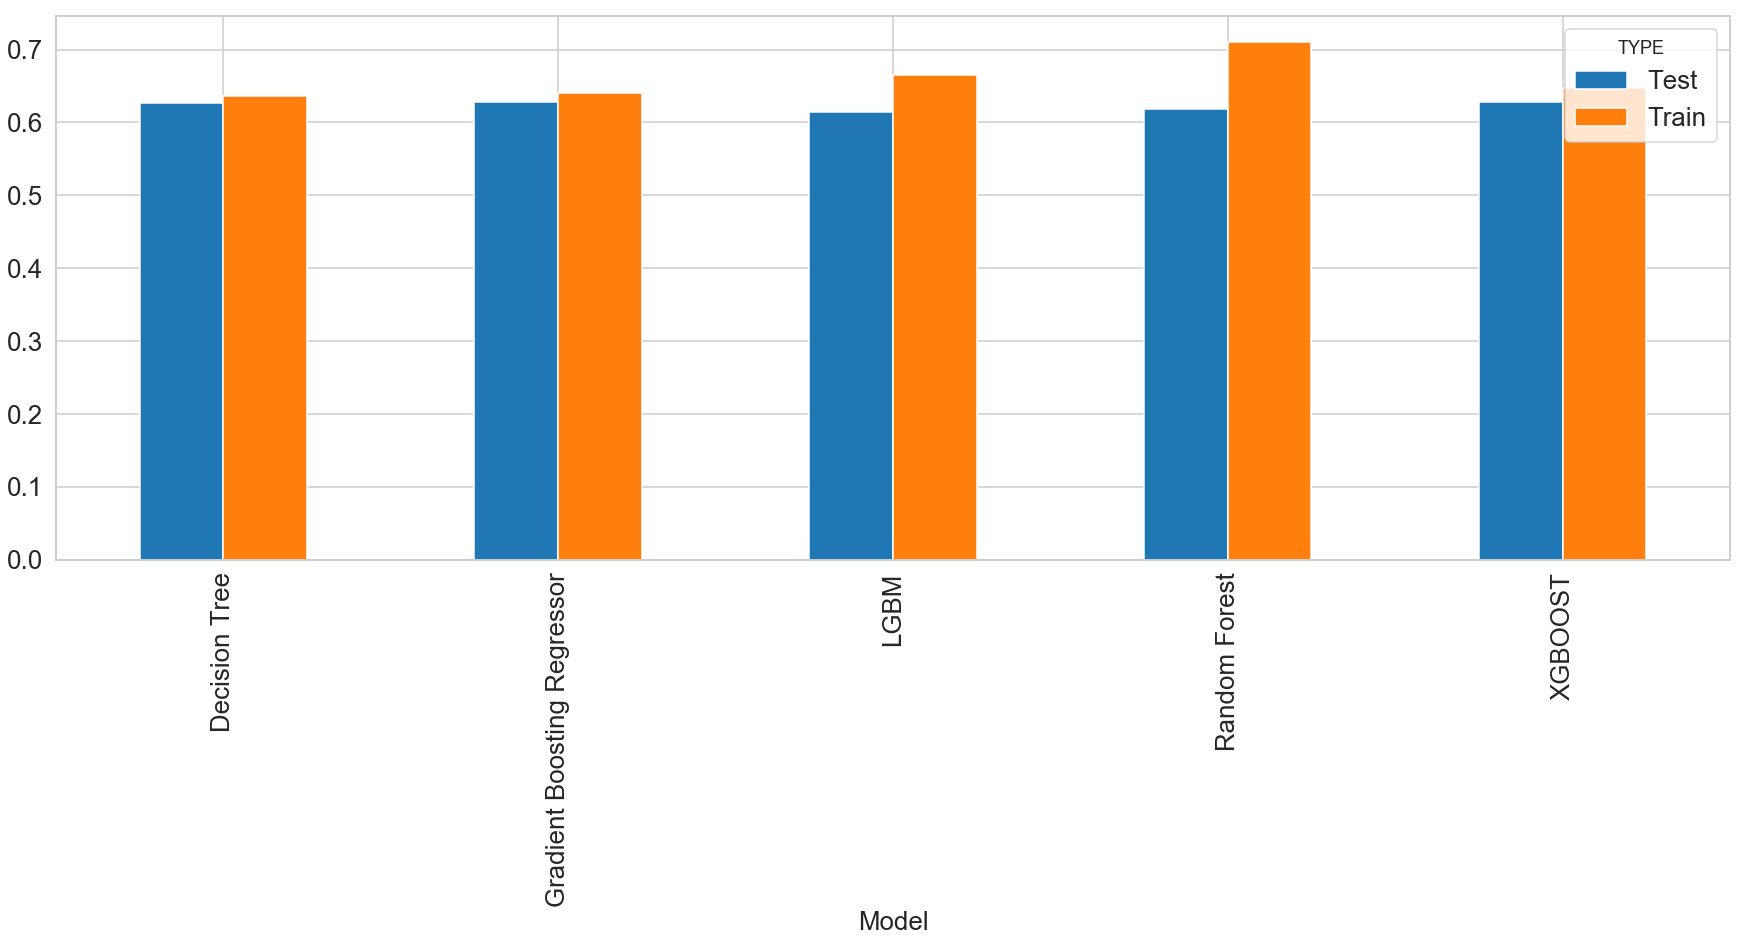

In [167]:
df.groupby(['Model','TYPE'])['R2_Value'].mean().unstack().plot.bar()


In [168]:
df = pd.DataFrame({'TYPE':type1,'MSE' : mse,'Model':algorithms})





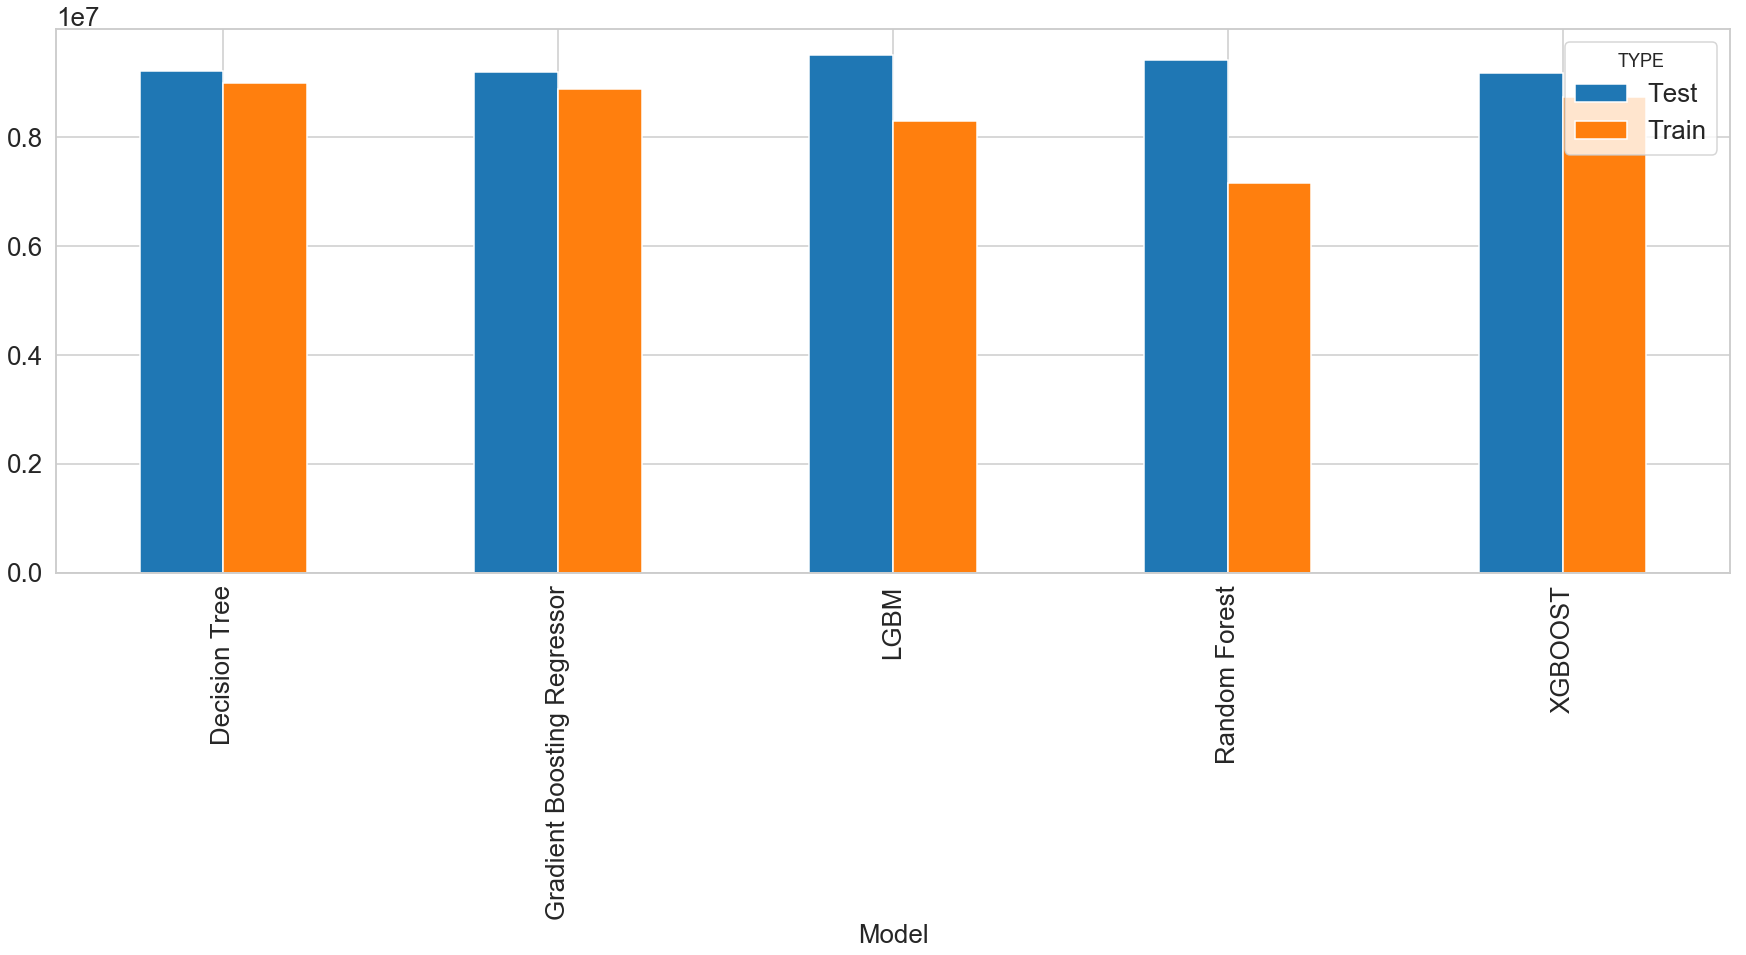

In [169]:
df.groupby(['Model','TYPE'])['MSE'].mean().unstack().plot.bar()



In [172]:
type2=['Train','Test','Train','Test','Train','Test','Train','Test','Train','Test']
algorithms2 = ['Decision Tree','Decision Tree','Random Forest','Random Forest','Gradient Boosting Regressor',\
              'Gradient Boosting Regressor','XGBOOST','XGBOOST','LGBM','LGBM']

mse = [9002309.0269,9217865.6264,7162115.2999,9427669.6522,8890539.7114,9192380.9399,8743671.9921,9173761.0918,8299148.7453,9514705.9013]



In [173]:
df1 = pd.DataFrame({'TYPE':type2,'MSE' : mse,'Model_Errors':algorithms})



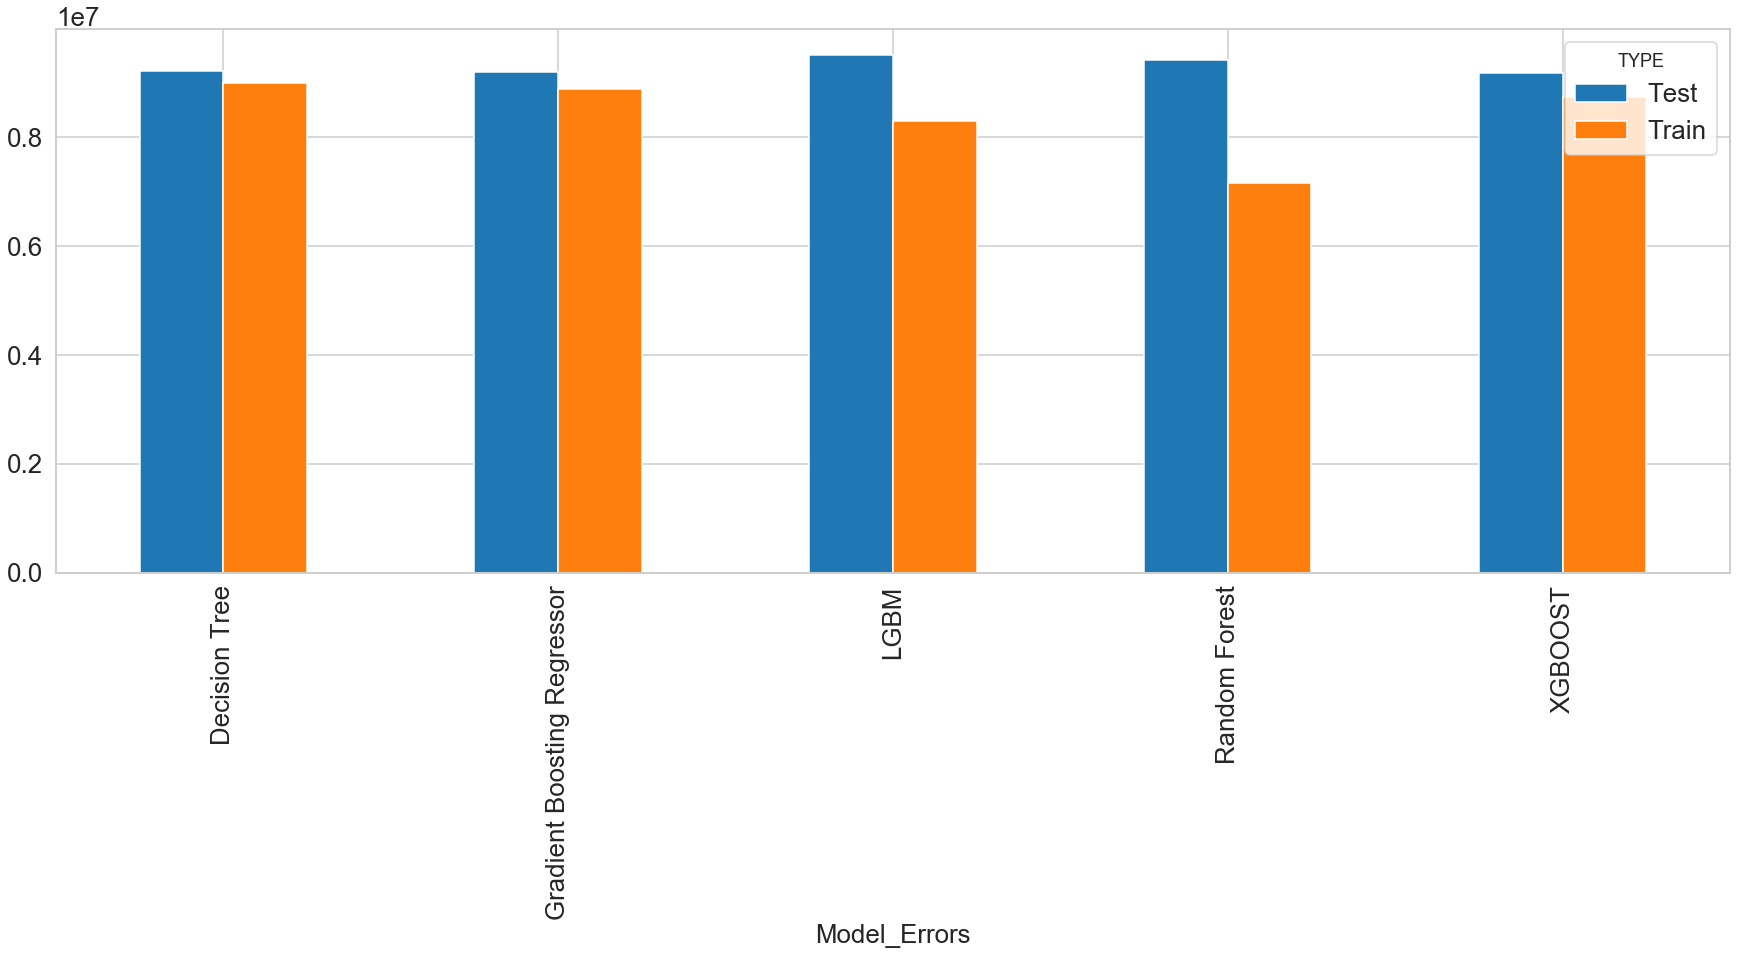

In [174]:
df1.groupby(['Model_Errors','TYPE'])['MSE'].mean().unstack().plot.bar()

